In [1]:
!pip install -U -q PyDrive2

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00


In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [12]:
def importdata():
    link_dataset = "https://drive.google.com/file/d/1GAqJyI1hp3v-xr1e6M94wQ4yyDaWOWkx/view?usp=sharing"
    id = link_dataset.split("/")[-2]

    downloaded = drive.CreateFile({'id':id})
    downloaded.GetContentFile('iris.csv')

    balance_data = pd.read_csv('iris.csv')
    # Displaying dataset information
    return balance_data

splitdataset là 1 hàm thực hiện chức năng cắt nhỏ tập hợp dữ liệu thành các tập huấn luyện và tập kiểm tra. Nó tách biến mục tiêu ( nhãn lớp ) từ các tính năng và chia nó bằng hàng train_test_split từ thư viện skit-learn. Nó được thử nghiệm với 30% và sử dụng trạng thái ngẫu nhiên là 100 để có thể tái tạo

In [4]:
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 0:4]
    Y = balance_data.values[:, -1]
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test




train_using_gini(X_train, X_test, y_train): Hàm này chịu trách nhiệm huấn luyện trình phân loại cây quyết định sử dụng chỉ mục Gini làm tiêu chí phân tách. Nó tạo ra một đối tượng phân loại với các tham số được chỉ định (tiêu chí, trạng thái ngẫu nhiên, độ sâu tối đa, lá mẫu tối thiểu) và huấn luyện nó trên dữ liệu huấn luyện.

In [ ]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

train_using_entropy(X_train, X_test, y_train): Hàm này chịu trách nhiệm huấn luyện trình phân loại cây quyết định sử dụng entropy làm tiêu chí phân tách. Nó tạo ra một đối tượng phân loại với các tham số được chỉ định (tiêu chí, trạng thái ngẫu nhiên, độ sâu tối đa, lá mẫu tối thiểu) và huấn luyện nó trên dữ liệu huấn luyện.

In [23]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=10, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

prediction (X_test, clf_object): Hàm này chịu trách nhiệm đưa ra dự đoán về dữ liệu thử nghiệm bằng cách sử dụng đối tượng phân loại được đào tạo. Nó chuyển dữ liệu thử nghiệm tới phương thức prediction() của trình phân loại và in nhãn lớp được dự đoán.
cal_accuracy(y_test, y_pred): Hàm này chịu trách nhiệm tính toán độ chính xác của các dự đoán. Nó tính toán và in ma trận nhầm lẫn, điểm chính xác và báo cáo phân loại, cung cấp đánh giá hiệu suất chi tiết.

In [16]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

Bằng cách sử dụng hàm plot_tree từ mô-đun con sklearn.tree để vẽ cây quyết định. Hàm này nhận các đối số sau:
*   clf_object: Đối tượng mô hình cây quyết định đã được huấn luyện.
*   fill=True: Đối số này lấp đầy các nút của cây bằng các màu khác nhau dựa trên đa số lớp được dự đoán.
*   feature_names: Đối số này cung cấp tên của các tính năng được sử dụng trong cây quyết định.
*   class_names: Đối số này cung cấp tên của các lớp khác nhau.
*   round=True: Đối số này làm tròn các góc của nút để có hình thức thẩm mỹ hơn.

In [21]:
# Function to plot the decision tree
def plot_decision_tree(clf_object,feature_names,class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

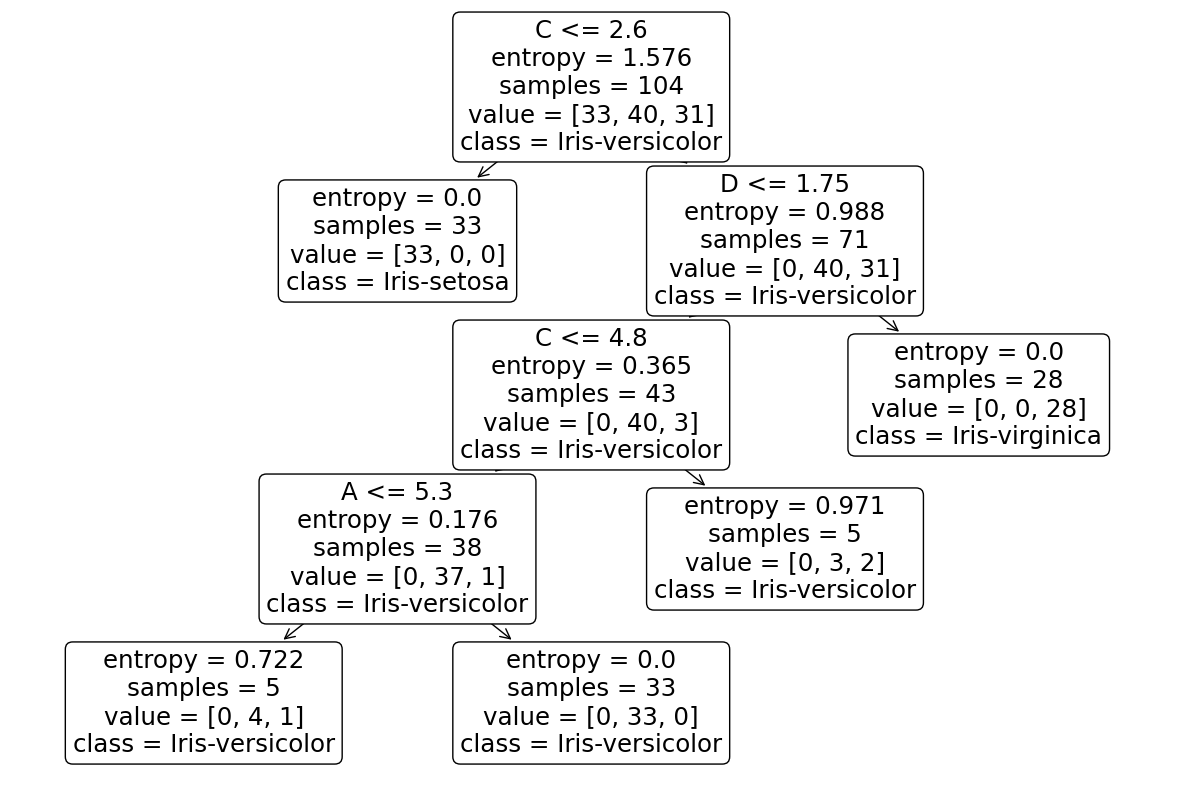

Results Using Entropy:
Predicted values:
['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']
Confusion Matrix:  [[16  0  0]
 [ 0  9  1]
 [ 0  2 17]]
Accuracy :  93.33333333333333
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-ve

In [24]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_entropy,['A','B','C','D'],['Iris-setosa','Iris-versicolor','Iris-virginica'])
    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)